### Price Projections for 1G and 10G Circuits by State Network States

Pivotal Card: https://www.pivotaltracker.com/story/show/168064877

In [1]:
import math
import numpy as np
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
HOST_DAR = os.environ.get("HOST_DAR")
USER_DAR = os.environ.get("USER_DAR")
PASSWORD_DAR = os.environ.get("PASSWORD_DAR")
DB_DAR = os.environ.get("DB_DAR")
PORT_DAR = os.environ.get("PORT_DAR")
GITHUB = os.environ.get("GITHUB")

In [3]:
#open connection to DB
myConnection = psycopg2.connect( host=HOST_DAR, 
                                user=USER_DAR, 
                                password=PASSWORD_DAR, 
                                database=DB_DAR, 
                                port=PORT_DAR)

sql_query = """
with upstreamos as (

select dli.district_id,
d.state_code,
dli.funding_year,
dli.num_lines,
dli.rec_cost / dli.num_lines as circuit_cost,
dli.bandwidth_received / dli.num_lines as circuit_size,
generate_series(1,dli.num_lines)

from ps.districts_line_items dli

join ps.districts d
on d.district_id = dli.district_id
and d.funding_year = dli.funding_year

join ps.line_items li
on li.line_item_id = dli.line_item_id
and li.funding_year = dli.funding_year

join ps.states_static ss
on ss.state_code = d.state_code

where dli.purpose = 'upstream'
and d.in_universe = true
and d.district_type = 'Traditional'
and dli.rec_cost != 0
and ss.state_network = true
)

select u.state_code,
u.funding_year,
u.circuit_size,
median(u.circuit_cost),
avg(u.circuit_cost)

from upstreamos u

where u.circuit_size in (1000,10000)

group by u.state_code,
u.funding_year,
u.circuit_size

order by u.circuit_size,
u.state_code,
u.funding_year
"""

#query data
cur = myConnection.cursor()
cur.execute(sql_query)
names = [x[0] for x in cur.description]
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=names)

In [46]:
df

,state_code,funding_year,circuit_size,median,avg
0,AL,2015,1000.0000000000000000,3060.9200000000000000000000,3231.9944444444444444444444
1,AL,2016,1000.0000000000000000,5700.00000000000000000000,5700.00000000000000000000
2,AR,2016,1000.0000000000000000,1206.00000000000000000000,1361.4533333333333333333333
3,AR,2017,1000.0000000000000000,1456.4500000000000000000000,2314.7497500000000000000000
4,AR,2018,1000.0000000000000000,1448.2250000000000000000000,2313.3132500000000000000000
5,AR,2019,1000.0000000000000000,1448.2250000000000000000000,2313.3132500000000000000000
6,CT,2017,1000.0000000000000000,895.00000000000000000000,895.00000000000000000000
7,CT,2018,1000.0000000000000000,895.00000000000000000000,895.00000000000000000000
8,CT,2019,1000.0000000000000000,895.00000000000000000000,895.00000000000000000000
9,DE,2015,1000.0000000000000000,1841.4575000000000000000000,1841.4575000000000000000000


In [62]:
df.columns

Index(['state_code', 'funding_year', 'circuit_size', 'median', 'avg'], dtype='object')

In [63]:
# convert to numeric
numeric_cols = ['circuit_size', 'median', 'avg']
df[numeric_cols] = df[numeric_cols].astype(float)

In [103]:
df.state_code.unique()

array(['AL', 'AR', 'CT', 'DE', 'GA', 'IA', 'KY', 'ME', 'MO', 'MS', 'ND',
       'NE', 'RI', 'SC', 'SD', 'UT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

3 no plot
6 no plot
7 no plot
8 no plot
15 no plot
19 no plot


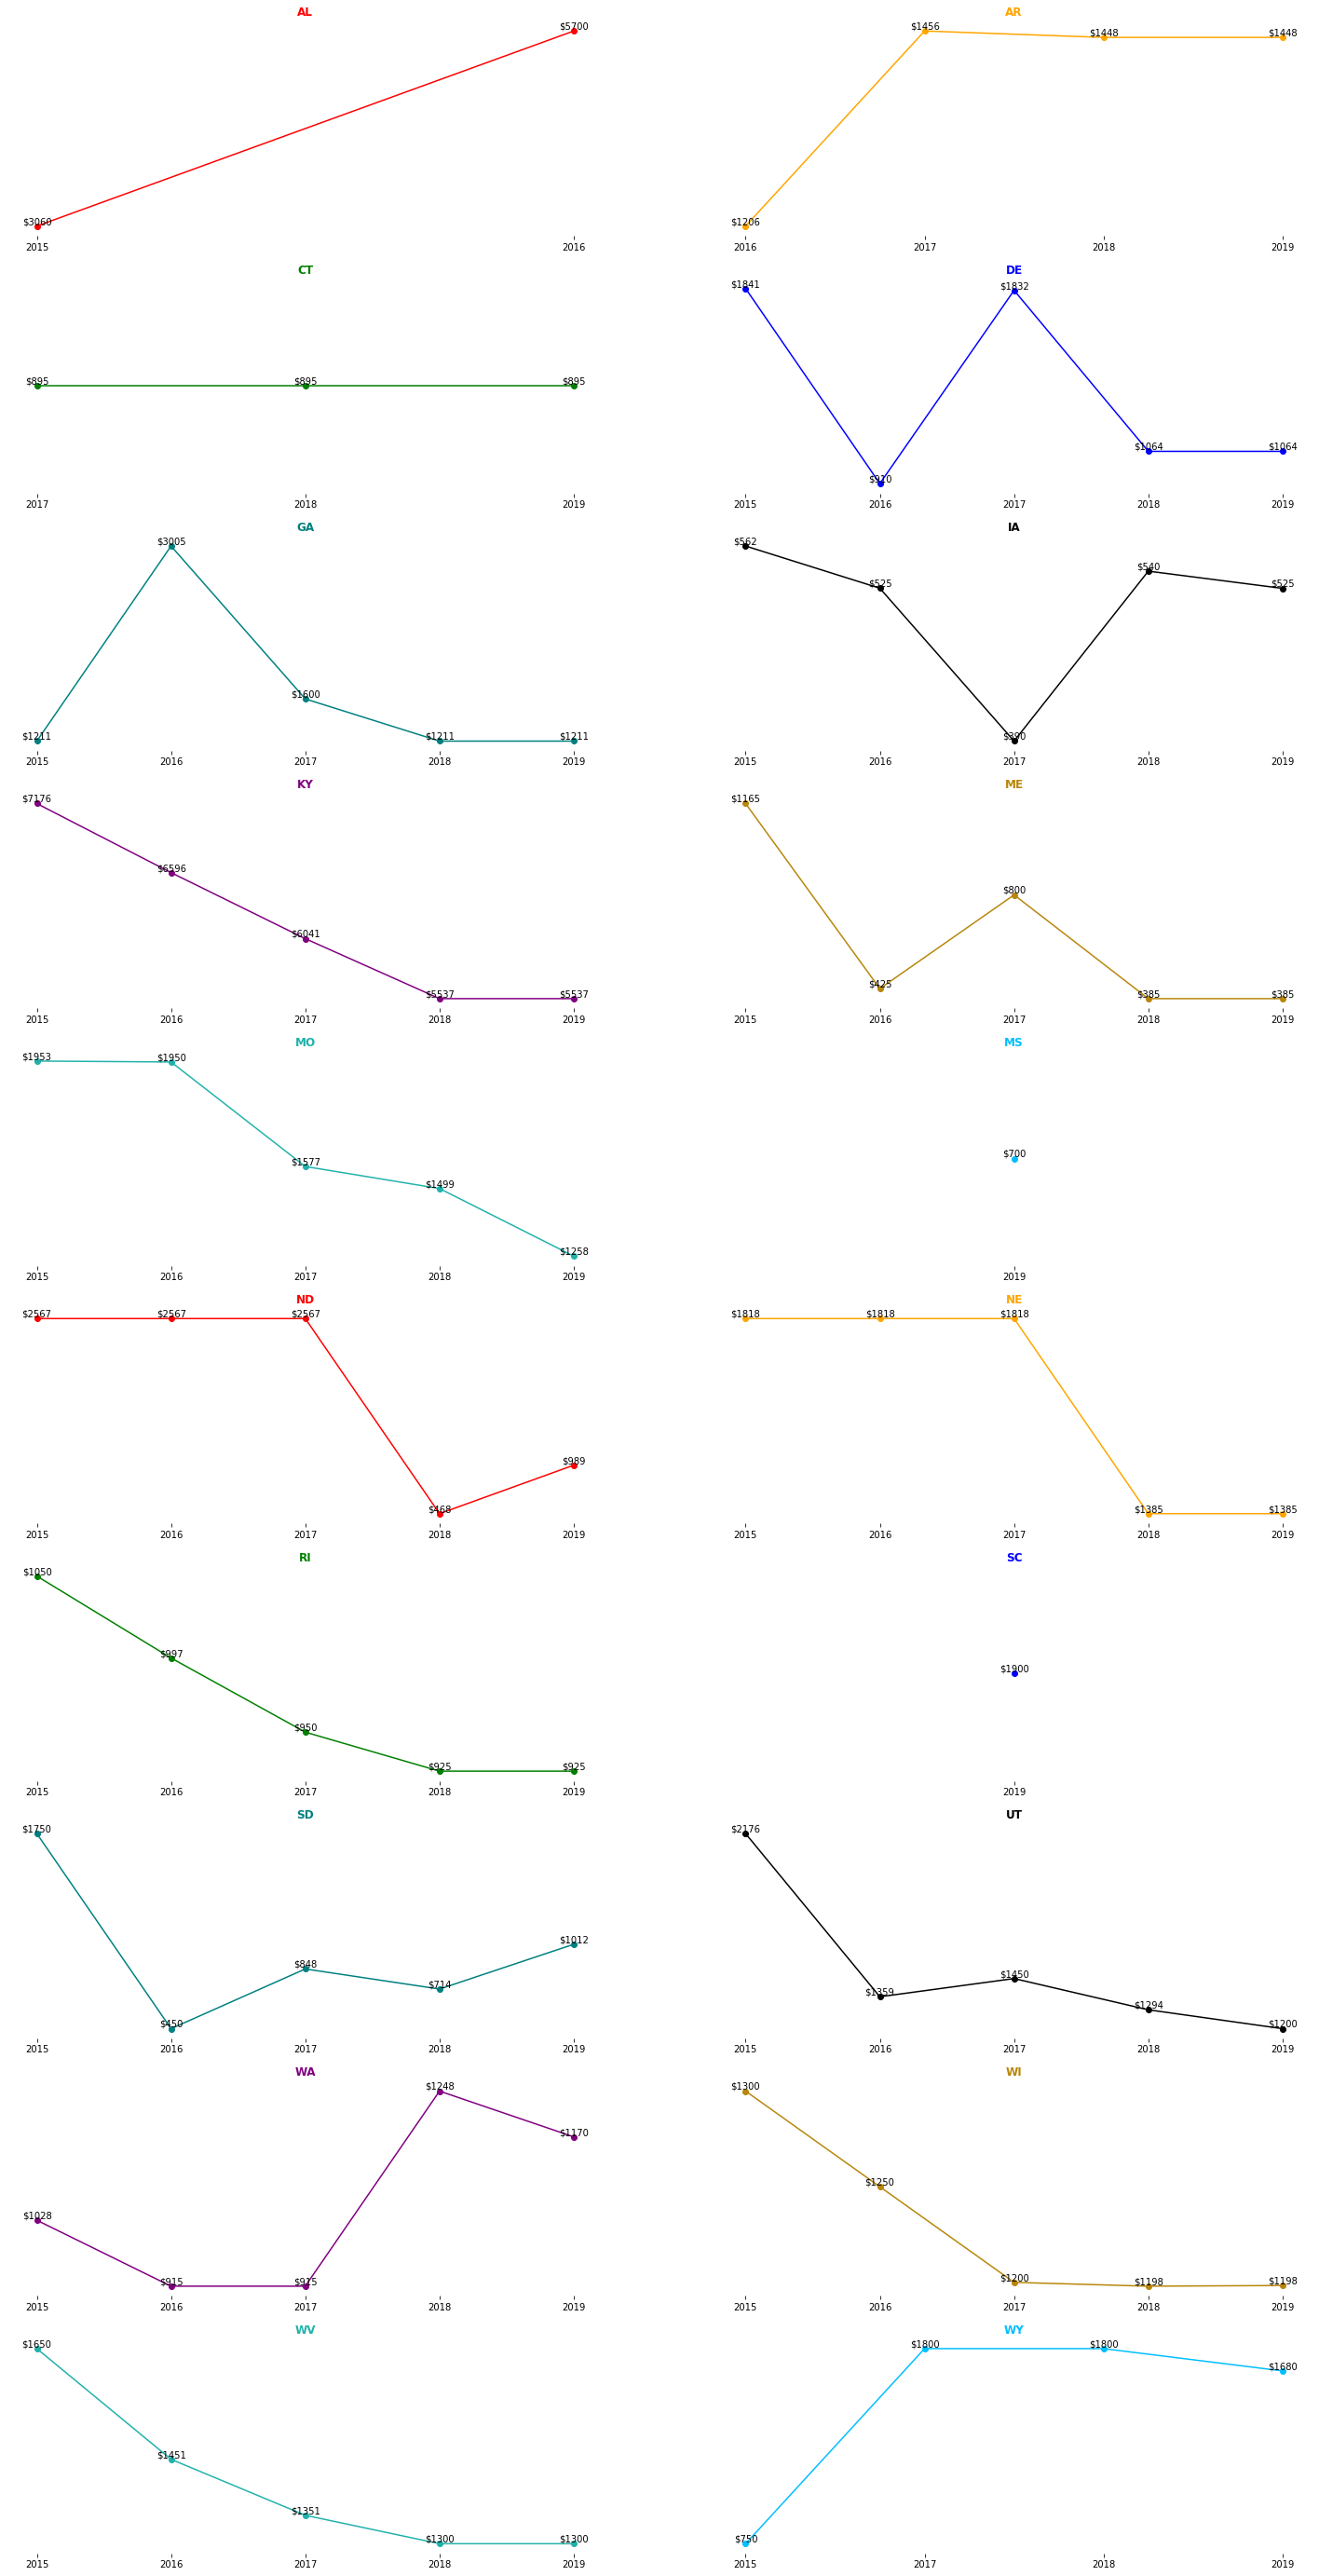

In [108]:
# Create Figure and Subplots
# 2 rows, 4 columns, 
fig, axes = plt.subplots(int(len(df.state_code.unique())/2), 2, sharey=False, sharex=False,
                         figsize=(25,50))  # 2 rows, 4 columns

colors = ['red', 'orange', 'green', 'blue', 'teal', 'black', 'purple', 'darkgoldenrod', 'lightseagreen', 'deepskyblue']*2

for i, state in enumerate(df.state_code.unique()):
    df_state = df[(df.state_code == state) & (df.circuit_size == 1000)]
    fy = df_state.funding_year.values
    median_vals = df_state['median'].values
    xmarks = np.arange(1, df_state.shape[0]+1)
    # Plot
    axes.ravel()[i].plot(xmarks, median_vals, marker='o', label='original', color=colors[i])
    axes.ravel()[i].set_title(state, color=colors[i], fontweight='bold')
    axes.ravel()[i].set_xticks(xmarks)
    axes.ravel()[i].set_xticklabels(fy)
    axes.ravel()[i].spines["top"].set_visible(False)
    axes.ravel()[i].spines["right"].set_visible(False)
    axes.ravel()[i].spines["left"].set_visible(False)
    axes.ravel()[i].spines["bottom"].set_visible(False)
    axes.ravel()[i].get_yaxis().set_visible(False)
    # add labels
    for x0, v0 in zip(xmarks, median_vals):
        axes.ravel()[i].text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')
    
#     if state in ['DE', 'KY', 'ME', 'MO', 'UT', 'WY']:
#         try: 
#             # assume linear projection
#             def func(x, a, b, c):
#                 return a * b*x + c

#             xdata = np.arange(1, len(median_vals)+1)

#             # fitting a curve
#             popt, pcov = curve_fit(func, xdata, median_vals) 

#             # projecting for new values
#             # fit: a=%5.3f, b=%5.3f, c=%5.3f
#             x_new = np.arange(1, 6)
#             axes.ravel()[i].plot(x_new, func(x_new, *popt), 
#                      '--', label='projected' % tuple(popt), marker='o', color='orange')
#             # add labels
#             for x0, v0 in zip(x_new, func(x_new, *popt)):
#                 axes.ravel()[i].text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')
#         except TypeError:
#             print(i, "no plot")
#             continue

    #plt.legend();
#     plt.xticks(np.arange(1, 10), np.arange(2015, 2024));
#     plt.title("1G Price Projection Using Median Price by Year");
# plt.savefig("median_price_1g_state_networks.png", bbox='tight', dpi=199)
        

In [163]:
def create_projection_1G(state, model_type='linear'):
    df_state = df[(df.state_code == state) & (df.circuit_size == 1000)]
    fy = df_state.funding_year.values
    xmarks = np.arange(1, df_state.shape[0]+1)

    if model_type == 'linear':
        # assume linear projection
        def func(x, b, c):
            return b*x + c
        
    else:
        def func(x, a, b, c):
            return np.exp(-b * x) + c

    plt.figure(figsize=(12, 7))
    median_vals = df_state['median'].values
    xdata = np.arange(0, len(median_vals))
    plt.plot(xdata, median_vals, marker='o', label='original')

    # fitting a curve
    popt, pcov = curve_fit(func, xdata, median_vals) 

    # projecting for new values
    x_new = np.arange(0, 6)
    plt.plot(x_new, func(x_new, *popt), 
             '--', label='projected', marker='o')

    # add labels
    for x0, v0 in zip(x_new, func(x_new, *popt)):
        plt.text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')

    plt.legend();
    plt.xticks(np.arange(0, 7), np.arange(2015, 2021));
    plt.title(state + ": 1G Price Projection Using Median Price by Year");

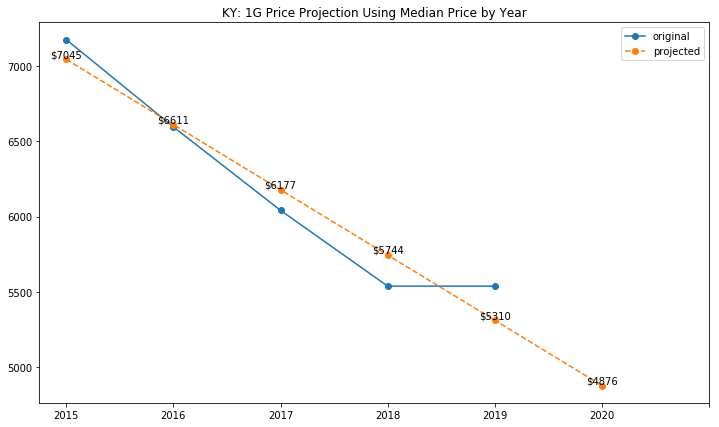

In [164]:
create_projection_1G('KY', 'linear')

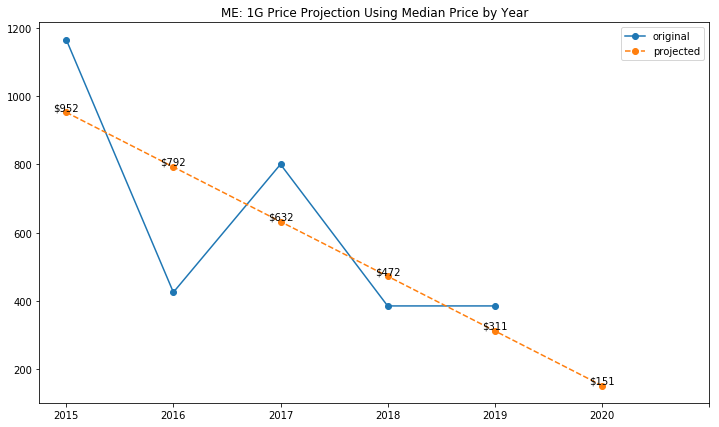

In [165]:
create_projection_1G('ME', 'linear')

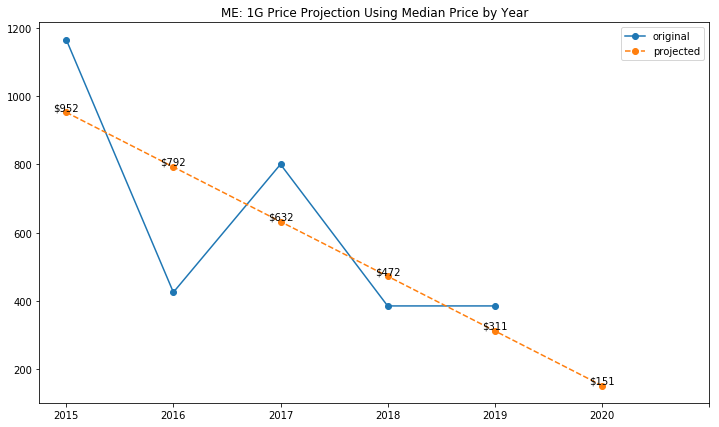

In [166]:
create_projection_1G('ME', 'linear')

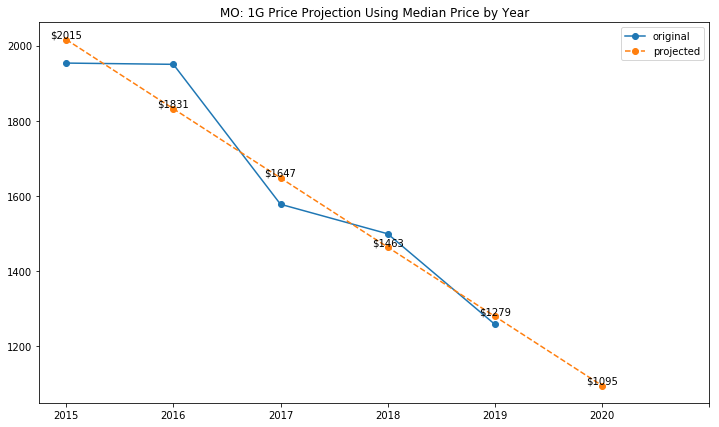

In [168]:
create_projection_1G('MO', 'linear')

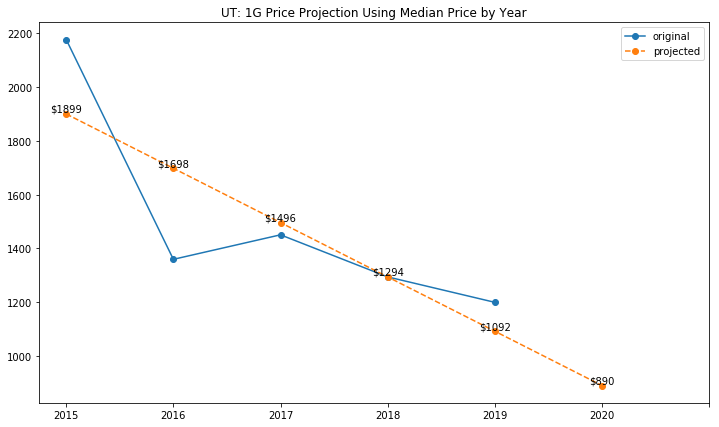

In [169]:
create_projection_1G('UT')

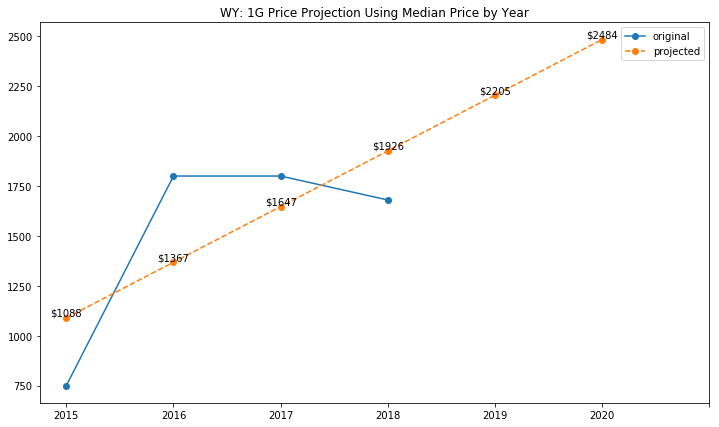

In [154]:
create_projection('WY')

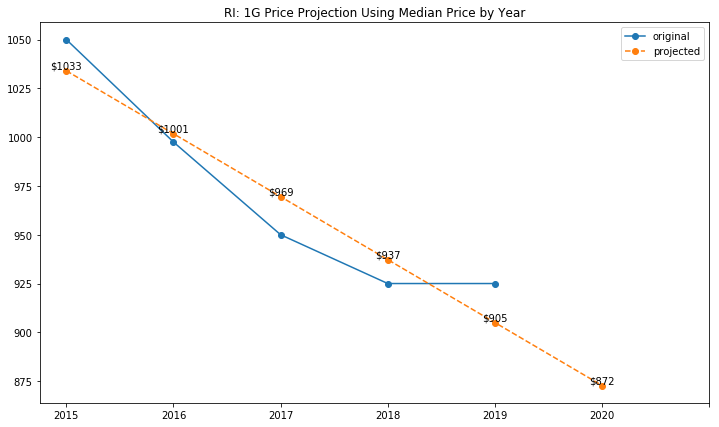

In [159]:
create_projection('RI', 'linear')

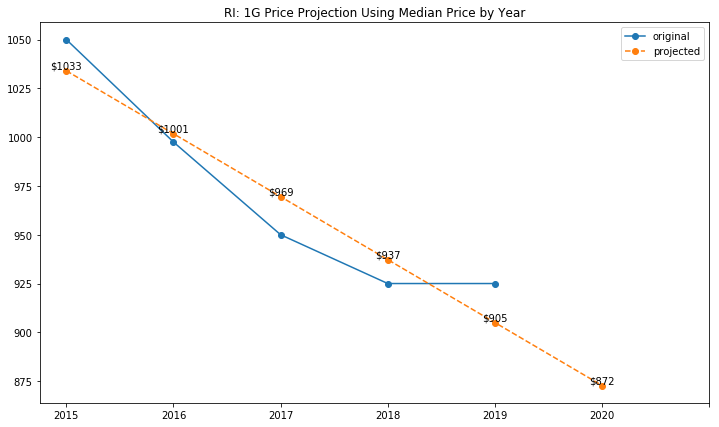

In [162]:
create_projection('RI', 'linear')

### 10G

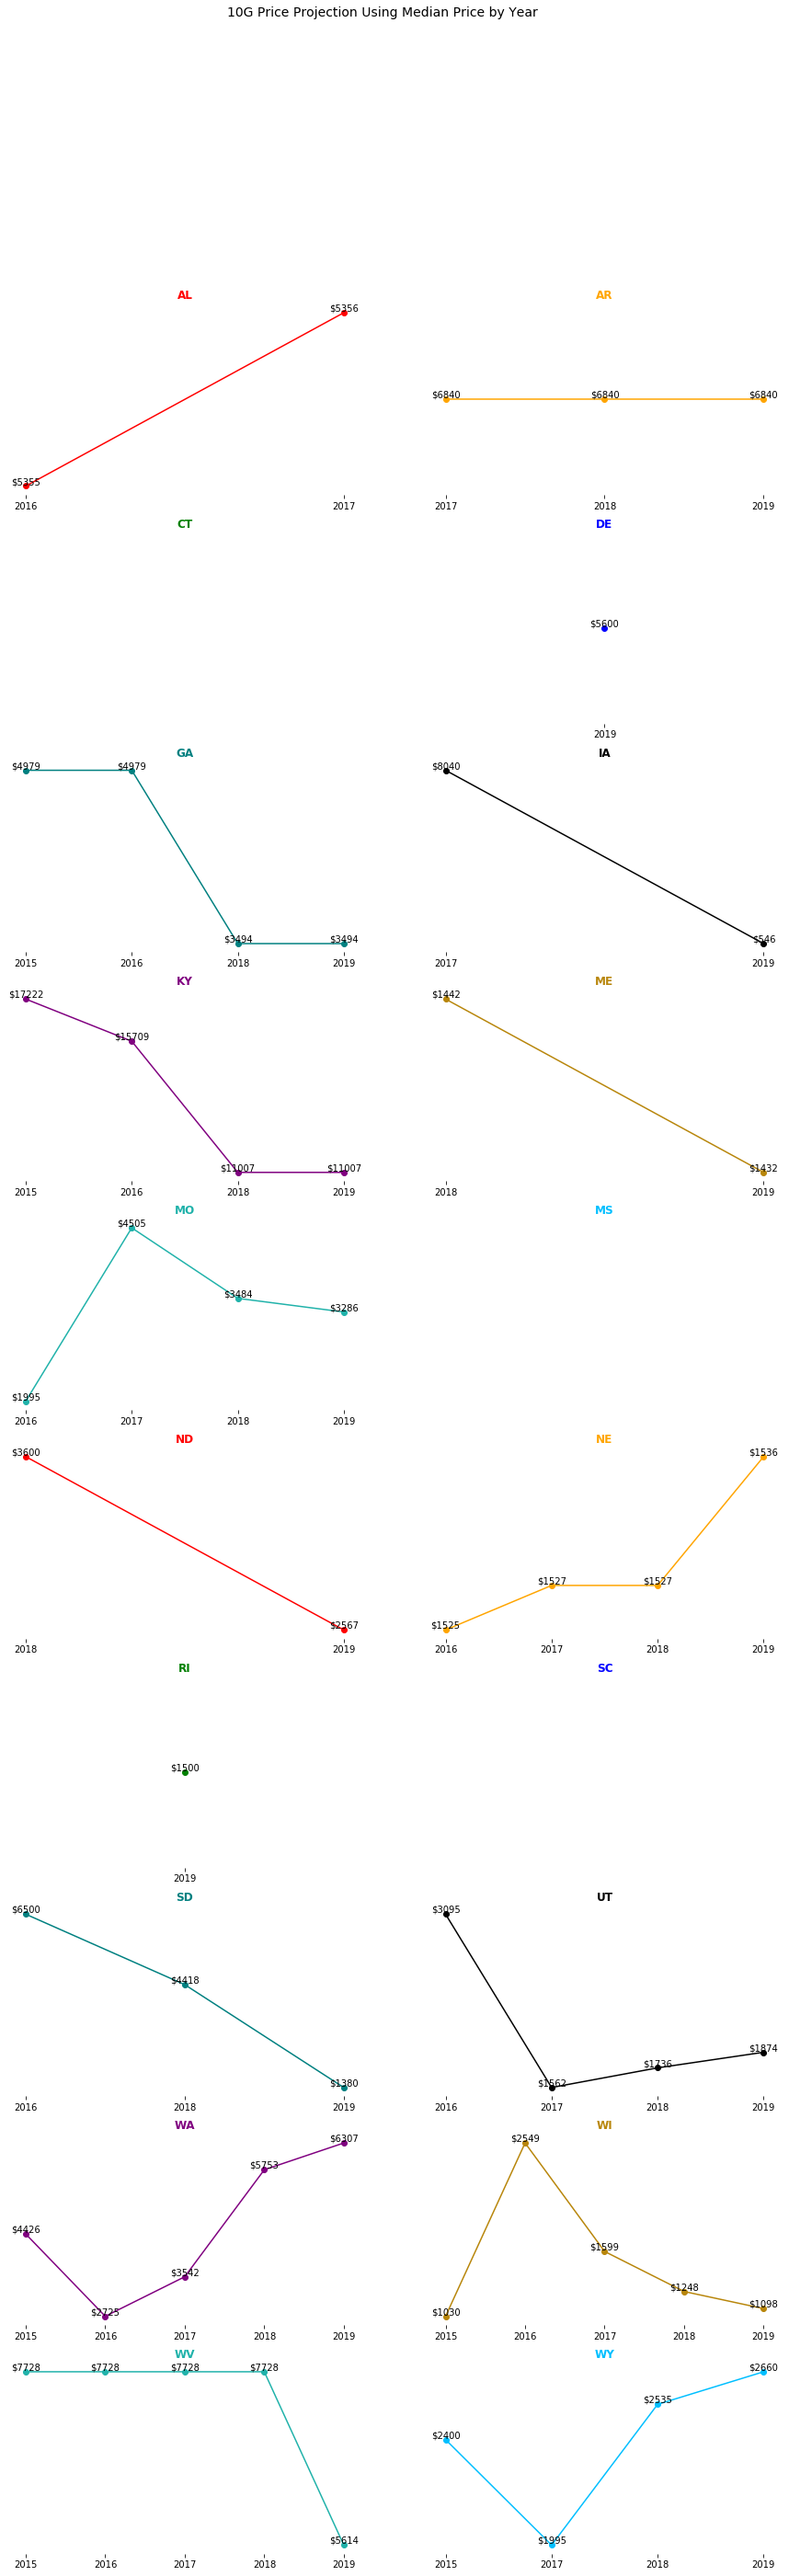

In [102]:
# Create Figure and Subplots
# 2 rows, 4 columns, 
fig, axes = plt.subplots(int(len(df.state_code.unique())/2), 2, sharey=False, sharex=False,
                         figsize=(15,45))  # 2 rows, 4 columns
fig.suptitle("10G Price Projection Using Median Price by Year", fontsize=14);
colors = ['red', 'orange', 'green', 'blue', 'teal', 'black', 'purple', 'darkgoldenrod', 'lightseagreen', 'deepskyblue']*2

for i, state in enumerate(df.state_code.unique()):
    df_state = df[(df.state_code == state) & (df.circuit_size == 10000)]
    fy = df_state.funding_year.values
    median_vals = df_state['median'].values
    xmarks = np.arange(1, df_state.shape[0]+1)
    # Plot
    axes.ravel()[i].plot(xmarks, median_vals, marker='o', label='original', color=colors[i])
    axes.ravel()[i].set_title(state, color=colors[i], fontweight='bold')
    axes.ravel()[i].set_xticks(xmarks)
    axes.ravel()[i].set_xticklabels(fy)
    axes.ravel()[i].spines["top"].set_visible(False)
    axes.ravel()[i].spines["right"].set_visible(False)
    axes.ravel()[i].spines["left"].set_visible(False)
    axes.ravel()[i].spines["bottom"].set_visible(False)
    axes.ravel()[i].get_yaxis().set_visible(False)
    # add labels
    for x0, v0 in zip(xmarks, median_vals):
        axes.ravel()[i].text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')
    
    try: 
        # assume linear projection
        def func(x, a, b, c):
            return a * b*x + c

        xdata = np.arange(1, len(median_vals)+1)

        # fitting a curve
        popt, pcov = curve_fit(func, xdata, median_vals) 

        # projecting for new values
        # fit: a=%5.3f, b=%5.3f, c=%5.3f
        x_new = np.arange(1, 10)
        axes.ravel()[i].plot(x_new, func(x_new, *popt), 
                 '--', label='projected' % tuple(popt), marker='o', color='orange')
        # add labels
        for x0, v0 in zip(x_new, func(x_new, *popt)):
            axes.ravel()[i].text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')
    except TypeError:
        continue

    plt.legend();
#     plt.xticks(np.arange(1, 10), np.arange(2015, 2024));

plt.savefig("median_price_10g_state_networks.png", bbox='tight', dpi=199)



In [171]:
def create_projection_10G(state, model_type='linear'):
    df_state = df[(df.state_code == state) & (df.circuit_size == 10000)]
    fy = df_state.funding_year.values
    xmarks = np.arange(1, df_state.shape[0]+1)

    if model_type == 'linear':
        # assume linear projection
        def func(x, b, c):
            return b*x + c
        
    else:
        def func(x, a, b, c):
            return np.exp(-b * x) + c

    plt.figure(figsize=(12, 7))
    median_vals = df_state['median'].values
    xdata = np.arange(0, len(median_vals))
    plt.plot(xdata, median_vals, marker='o', label='original')

    # fitting a curve
    popt, pcov = curve_fit(func, xdata, median_vals) 

    # projecting for new values
    x_new = np.arange(0, 6)
    plt.plot(x_new, func(x_new, *popt), 
             '--', label='projected', marker='o')

    # add labels
    for x0, v0 in zip(x_new, func(x_new, *popt)):
        plt.text(x0, v0, "$"+str(int(v0)), ha='center', va='bottom', color='black')

    plt.legend();
    plt.xticks(np.arange(0, 7), np.arange(2015, 2021));
    plt.title(state + ": 10G Price Projection Using Median Price by Year");